<a href="https://colab.research.google.com/github/2kunal6/UniBonn/blob/master/cuda_lab/2/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Files already downloaded and verified
Files already downloaded and verified


  1%|          | 15/1407 [00:00<00:09, 147.53it/s]

datasets loaded
Running on the GPU


  1%|          | 14/1407 [00:00<00:10, 136.38it/s]

epoch: 0, loss: 1.9944283962249756


  1%|          | 15/1407 [00:00<00:09, 148.68it/s]

epoch: 1, loss: 1.9830219745635986


  1%|          | 15/1407 [00:00<00:09, 144.51it/s]

epoch: 2, loss: 1.7489298582077026


  1%|          | 15/1407 [00:00<00:09, 146.02it/s]

epoch: 3, loss: 1.8318694829940796


  1%|          | 14/1407 [00:00<00:10, 134.72it/s]

epoch: 4, loss: 2.188120126724243


  1%|          | 15/1407 [00:00<00:09, 146.17it/s]

epoch: 5, loss: 1.8983986377716064


  1%|          | 14/1407 [00:00<00:10, 135.77it/s]

epoch: 6, loss: 1.4735448360443115


  1%|          | 14/1407 [00:00<00:10, 138.21it/s]

epoch: 7, loss: 1.7980623245239258


  1%|          | 14/1407 [00:00<00:10, 135.77it/s]

epoch: 8, loss: 2.0125982761383057


  1%|          | 15/1407 [00:00<00:09, 142.22it/s]

epoch: 9, loss: 1.4063315391540527


  1%|          | 14/1407 [00:00<00:09, 139.87it/s]

epoch: 10, loss: 1.078657865524292


  1%|          | 14/1407 [00:00<00:10, 137.19it/s]

epoch: 11, loss: 1.3587735891342163


  0%|          | 0/1407 [00:00<?, ?it/s]

epoch: 12, loss: 1.9667856693267822


  0%|          | 0/1407 [00:00<?, ?it/s]

epoch: 13, loss: 1.5967007875442505


  1%|          | 14/1407 [00:00<00:10, 134.56it/s]

epoch: 14, loss: 1.676146388053894


  1%|          | 15/1407 [00:00<00:09, 145.99it/s]

epoch: 15, loss: 1.6525942087173462


  1%|          | 15/1407 [00:00<00:09, 149.71it/s]

epoch: 16, loss: 1.190431833267212


  1%|          | 14/1407 [00:00<00:10, 139.30it/s]

epoch: 17, loss: 1.873032569885254


  1%|          | 15/1407 [00:00<00:09, 141.77it/s]

epoch: 18, loss: 1.871260643005371


100%|██████████| 1407/1407 [00:21<00:00, 65.36it/s]


epoch: 19, loss: 1.8035389184951782


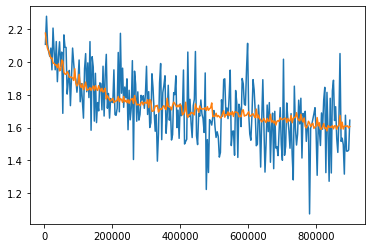

[[448  17  94  14  70  31  26  32 198  70]
 [ 62 370  10  25  24  14  33  22 143 297]
 [122  13 316  86 114 111  96  53  46  43]
 [ 64  11  87 209  67 241 117  56  47 101]
 [137   9 180  57 291  73  88  66  56  43]
 [ 63  11  84 128  63 418  53  81  47  52]
 [ 70  39  90  87 102 100 361  29  65  57]
 [ 71   9  75  59  85 101  41 417  54  88]
 [131  38  27  18  32  34  19  26 582  93]
 [ 39 108  19  37  18  26  31  39  95 588]]
Accuracy of the network on the 10000 test images: 40.0


In [20]:
import torch
import torchvision
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

np.random.seed(1)

transform_list = transforms.Compose([
            transforms.Grayscale(num_output_channels=1),
            transforms.ToTensor()
            #transforms.Normalize([0.5,],[0.5,])
        ])
train = datasets.CIFAR10("./", train=True, transform=transform_list, download=True)

test = torch.utils.data.DataLoader(
    datasets.CIFAR10("./", train=False, transform=transform_list, download=True), batch_size = 32, shuffle = True
)

print("datasets loaded")

IMG_SIZE = 32*32

'''for data in train:
  X, y = data[0][0], data[1][0]
  plt.imshow(X.view(32, 32))
  print("Label: " + str(y))
  plt.show()
  break'''

class LogisticRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LogisticRegression, self).__init__()
    self.linear1 = nn.Linear(input_dim, 300)
    self.linear2 = nn.Linear(300, output_dim)
    self.relu = nn.ReLU()

  def forward(self, x):
    out = self.relu(self.linear1(x))
    out = self.linear2(out)
    return out

if torch.cuda.is_available():
    device = torch.device("cuda:0")  # you can continue going on here, like cuda:1 cuda:2....etc. 
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

model = LogisticRegression(IMG_SIZE, 10).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

criterion = nn.CrossEntropyLoss().to(device)

def test_perform(test_data):
  total = 0
  correct = 0

  y_true = []
  y_pred = []

  loss = 0.0
  i=0
  with torch.no_grad():
    for data in test_data:
      X, y = data[0].to(device), data[1].to(device)

      output = model(X.view(-1, IMG_SIZE))
      _, predicted = torch.max(output, 1)

      loss += criterion(output, y)

      total += y.size(0)
      correct += (predicted == y).sum().item()

      y_pred.extend(predicted.tolist())
      y_true.extend(y.tolist())

      i+=1

    accuracy = 100 * correct / total
    return accuracy, y_true, y_pred, loss/i

BATCH_SIZE = 32

loss_train = []
loss_val = []
iter_list = []
iter_num = 0

for epoch in range(20):
  train_size = int(0.9 * len(train))
  val_size = len(train) - train_size
  train_dataset, val_dataset = torch.utils.data.random_split(train, [train_size, val_size])
  train_loader = torch.utils.data.DataLoader(train_dataset,batch_size = BATCH_SIZE, shuffle = True)
  val_loader = torch.utils.data.DataLoader(val_dataset, batch_size = BATCH_SIZE, shuffle = True)

  for data in tqdm(train_loader):
    X, y = data[0].to(device), data[1].to(device)
    
    optimizer.zero_grad()
    
    output = model(X.view(-1, IMG_SIZE))
    
    loss = criterion(output, y)
    
    loss.backward()
    
    optimizer.step()
    
    iter_num+=BATCH_SIZE

    if(iter_num%(BATCH_SIZE*100) == 0):
      _, _, _, val_loss = test_perform(val_loader)

      iter_list.append(iter_num)
      loss_train.append(loss)
      loss_val.append(val_loss)

    
  print(f'epoch: {epoch}, loss: {loss}')

plt.plot(iter_list, loss_train)
plt.plot(iter_list, loss_val)
plt.show()

    
accuracy, y_true, y_pred, _ = test_perform(test)

print(confusion_matrix(y_true, y_pred))
print(f'Accuracy of the network on the 10000 test images: {accuracy}')